# Nelaturi_MahemaReddy_HW7

##### Name: Mahema Reddy Nelaturi 
##### Github Username: mahemareddy
##### USCID: 2814428295

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import warnings
# from sklearn.exceptions import ConvergenceWarning

# warnings.filterwarnings("ignore", category=ConvergenceWarning)


import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your code here

# Inspect warning message
with warnings.catch_warnings():
    warnings.simplefilter("always")
    # Run the code that produces the warning
    # For example:
    # Your training code here



### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [4]:
data = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
X_data = data[data.columns[:-4]]
X_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [6]:
Y_data = data[data.columns[-4:-1]]
Y_data

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

In [8]:
data_train = pd.concat([X_train,y_train], axis= 1)
data_train = data_train.reset_index(drop= True)
data_test = pd.concat([X_test,y_test], axis= 1)
data_test = data_test.reset_index(drop= True)
# data_train
# data_test

### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

Exact match: This means every label of a sample must be exactly the same as its in data set. This is also known as a sample-based accuracy.
An exact match occurs when the predicted class label for an instance is identical to the true class label.
In multi-class classification, an exact match means that the predicted class label matches all the true class labels for a particular instance.

Hamming Loss: This is a label-based metric that counts each single miss-matched label rather than consider the lables of a sample as one.
In multi-label classification, each instance can be associated with multiple labels, and the goal is to predict all relevant labels for each instance. Hamming Loss measures the fraction of labels that are incorrectly predicted by the model.



In [9]:
summary = {"classifier":[], "exact_match":[], "hamming_loss":[]}

In [10]:
def exact_match(y, y_pred):
    temp = 0
    for true, pred in zip(y.values, y_pred.values):
        match = (true == pred)
        if sum(match) == y.shape[1]:
            temp += 1;
    match = temp / y.shape[0]
    print("The exact match value is ", match)
    return match

In [11]:
def hamming_loss(y, y_pred):
    temp = 0
    for truth, pred in zip(y.values, y_pred.values):
        miss = (truth != pred)
        temp += np.sum(miss)
    loss = temp / (y.shape[0] * y.shape[1])
    print("The Hamming Loss is ", loss)
    return loss

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [12]:
# with Raw attributes
parameters  = {"C": np.logspace(-5, 4, 10), "gamma": np.logspace(-5, 4, 10)}
y_predict_test = pd.DataFrame(columns= y_test.columns)
y_predict_train = pd.DataFrame(columns= y_train.columns)

for column in y_train.columns:
    y_train_temp = y_train[column]
    
    SVCModel = SVC(kernel="rbf", decision_function_shape='ovr')
    clf = GridSearchCV(SVCModel, parameters, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    clf.fit(X_train, y_train_temp)
    
    best_clf = clf.best_estimator_
    
    y_train_predict_val = best_clf.predict(X_train)
    y_predict_train.loc[:, column] = y_train_predict_val
    
    y_predict_val = best_clf.predict(X_test)    
    y_predict_test.loc[:, column] = y_predict_val
    
    print("The "+ column + " column with Raw Data has the following best parameters: ", clf.best_params_)

print("The evaluation for Train data using Raw attributes and Gaussian Kernel is ")
exact_match(y_train, y_predict_train)
hamming_loss(y_train, y_predict_train)

print("The evaluation for Test data using Raw attributes and Gaussian Kernel is as follows: ")
exactmatch = exact_match(y_test, y_predict_test)
hamloss = hamming_loss(y_test, y_predict_test)

summary["classifier"].append("Gaussian Kernel with Raw data")
summary["exact_match"].append(exactmatch)
summary["hamming_loss"].append(hamloss)

The Family column with Raw Data has the following best parameters:  {'C': 100.0, 'gamma': 1.0}
The Genus column with Raw Data has the following best parameters:  {'C': 100.0, 'gamma': 1.0}
The Species column with Raw Data has the following best parameters:  {'C': 10.0, 'gamma': 1.0}
The evaluation for Train data using Raw attributes and Gaussian Kernel is 
The exact match value is  0.9990071485305798
The Hamming Loss is  0.0003309504898067249
The evaluation for Test data using Raw attributes and Gaussian Kernel is as follows: 
The exact match value is  0.9861046780917091
The Hamming Loss is  0.008337193144974525


In [13]:
# Standardized Attributes
parameters = {"C": np.logspace(-5, 4, 10), "gamma": np.logspace(-9, 5, 10)}

std=StandardScaler()
X_train_stand = std.fit_transform(X_train)
X_test_stand = std.transform(X_test)



y_predict_test = pd.DataFrame(columns=y_test.columns)
y_predict_train = pd.DataFrame(columns=y_train.columns)

for col in y_train.columns:
    y_train_temp = y_train[col]
    
    SVCModel = SVC(kernel="rbf", decision_function_shape='ovr')
    clf = GridSearchCV(SVCModel, parameters, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    clf.fit(X_train_stand, y_train_temp)
    
    best_clf = clf.best_estimator_
    
    y_train_predict = best_clf.predict(X_train_stand)
    y_predict_train.loc[:, col] = y_train_predict
    
    y_pred_val = best_clf.predict(X_test_stand)
    y_predict_test.loc[:, col] = y_pred_val
    
    print("The " + col + " column with Standardized Data has the following best parameters ", clf.best_params_)

print("The evaluation for Train data using Standardized attributes and Gaussian Kernel is as follows:")
exact_match(y_train, y_predict_train)
hamming_loss(y_train, y_predict_train)

print("The evaluation for Test data using Standardized attributes and Gaussian Kernel is ")
exactmatch = exact_match(y_test, y_predict_test)
hamloss = hamming_loss(y_test, y_predict_test)

summary["classifier"].append("Gaussian Kernel with Standardized data")
summary["exact_match"].append(exactmatch)
summary["hamming_loss"].append(hamloss)

The Family column with Standardized Data has the following best parameters  {'C': 10.0, 'gamma': 0.05994842503189409}
The Genus column with Standardized Data has the following best parameters  {'C': 10.0, 'gamma': 0.05994842503189409}
The Species column with Standardized Data has the following best parameters  {'C': 10.0, 'gamma': 0.05994842503189409}
The evaluation for Train data using Standardized attributes and Gaussian Kernel is as follows:
The exact match value is  0.999801429706116
The Hamming Loss is  0.00013238019592268997
The evaluation for Test data using Standardized attributes and Gaussian Kernel is 
The exact match value is  0.9861046780917091
The Hamming Loss is  0.009881117801451289


### iii. Repeat 1(b)ii with L1 -penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [14]:
parameters = {"C": np.logspace(-5, 4, 10)}

y_predict_test = pd.DataFrame(columns=y_test.columns)
y_predict_train = pd.DataFrame(columns=y_train.columns)

for col in y_train.columns:
    y_train_temp = y_train[col]
    
    LinearSvc = LinearSVC(penalty= 'l1',dual= False, max_iter=30000)
    clf = GridSearchCV(LinearSvc, parameters, cv= StratifiedKFold(10, random_state= 42, shuffle= True), n_jobs= -1)
    clf.fit(X_train_stand, y_train_temp)
    
    best_clf = clf.best_estimator_
    
    y_train_predict = best_clf.predict(X_train_stand)
    y_predict_train.loc[:, col] = y_train_predict
    
    y_pred_val = best_clf.predict(X_test_stand)
    y_predict_test.loc[:, col] = y_pred_val
    
    print("The " + col + " column with Standardized Data and L1 penalty has the best parameters as ", clf.best_params_)

print("The evaluation for Train data using Standardized attributes and L1 penalized SVM is ")
exact_match(y_train, y_predict_train)
hamming_loss(y_train, y_predict_train)

print("The evaluation for Test data using Standardized attributes and L1 penalized SVM is ")
exactmatch = exact_match(y_test, y_predict_test)
hamloss = hamming_loss(y_test, y_predict_test)

summary["classifier"].append("L1 Penalized SVM")
summary["exact_match"].append(exactmatch)
summary["hamming_loss"].append(hamloss)

The Family column with Standardized Data and L1 penalty has the best parameters as  {'C': 10.0}
The Genus column with Standardized Data and L1 penalty has the best parameters as  {'C': 1000.0}


/Users/mahemareddy/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mahemareddy/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mahemareddy/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The Species column with Standardized Data and L1 penalty has the best parameters as  {'C': 10.0}
The evaluation for Train data using Standardized attributes and L1 penalized SVM is 
The exact match value is  0.9251389992057188
The Hamming Loss is  0.04520783690759862
The evaluation for Test data using Standardized attributes and L1 penalized SVM is 
The exact match value is  0.9124594719777674
The Hamming Loss is  0.05697081982399259


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [15]:
parameters = {"C": np.logspace(1, 5, 5)}

y_predict_test = pd.DataFrame(columns= y_test.columns)
y_predict_train = pd.DataFrame(columns= y_train.columns)
classifiers = {}

for col in y_train.columns:
    y_train_temp = y_train[col]
    y_test_temp = y_test[col]
    
    smote = SMOTE(random_state= 42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_stand, y_train_temp)
    X_test_smote, y_test_smote = smote.fit_resample(X_test_stand, y_test_temp)
    
    LinearSvc = LinearSVC(penalty= 'l1',dual= False, max_iter=30000)
    clf = GridSearchCV(LinearSvc, parameters, cv= StratifiedKFold(10, random_state= 42, shuffle= True), n_jobs= -1)
    clf.fit(X_train_smote, y_train_smote)
    
    best_clf = clf.best_estimator_
    classifiers[col] = best_clf
    
    print("The " + col + " column using SMOTE has the best parameters as", clf.best_params_)

for col in y_train.columns:
    
    svc = LinearSVC(penalty= 'l1',dual = False, max_iter=30000)    
    y_train_predict = classifiers[col].predict(X_train_stand)
    y_predict_train.loc[:, col] = y_train_predict
    
    y_pred = classifiers[col].predict(X_test_stand)
    y_predict_test.loc[:, col] = y_pred 
    
    
print("The evaluation for Train data using SMOTE is ")
exact_match(y_train, y_predict_train)
hamming_loss(y_train, y_predict_train)

print("The evaluation for Test data using SMOTE is ")
exactMatch = exact_match(y_test, y_predict_test)
hamLoss = hamming_loss(y_test, y_predict_test)

summary["classifier"].append("SMOTE")
summary["exact_match"].append(exactMatch)
summary["hamming_loss"].append(hamLoss)

The Family column using SMOTE has the best parameters as {'C': 10.0}
The Genus column using SMOTE has the best parameters as {'C': 10.0}
The Species column using SMOTE has the best parameters as {'C': 10.0}
The evaluation for Train data using SMOTE is 
The exact match value is  0.8701350277998412
The Hamming Loss is  0.06347630394492984
The evaluation for Test data using SMOTE is 
The exact match value is  0.8531727651690597
The Hamming Loss is  0.07704184035819052


In [16]:
print(pd.DataFrame(summary))

                               classifier  exact_match  hamming_loss
0           Gaussian Kernel with Raw data     0.986105      0.008337
1  Gaussian Kernel with Standardized data     0.986105      0.009881
2                        L1 Penalized SVM     0.912459      0.056971
3                                   SMOTE     0.853173      0.077042


From the summary, we infer that the exact match evaluation for Gaussian Kernal with both Raw and Standardized data is same and the Hamming score/loss is lowest for Gaussian Kernal with Raw data. Hence, the Gassian Kernal classifier performs better than L1 and SMOTE.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set

### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species

In [17]:
hamming_loss = []
hamming_dist = []
for i in range(1, 51):
    # Optimal K for clustering using Silhouttes
    avg_scores_temp = []
    for k in range(2, 51):
        kmeans = KMeans(n_clusters= k, random_state= i)
        Z = kmeans.fit_predict(X_data)
        avg_scores_temp.append(silhouette_score(X_data, Z))
    temp_best_k = avg_scores_temp.index(max(avg_scores_temp)) + 2  
    print('The "' + str(i) + '" iteration has the best k as ',temp_best_k)
    
    kmeans = KMeans(n_clusters= temp_best_k, random_state= i)
    Z = kmeans.fit_predict(X_data)
    
    mismatched = 0
    Y_data['predicted'] = Z
    top_label = dict()
    for idx in range(temp_best_k):
        temp = {}
        matched_label = Y_data[Y_data['predicted'] == idx]
        for col in Y_data.columns[:-1]:
            temp[col] = Counter(matched_label[col]).most_common(1)[0][0]
            mismatched += sum(matched_label[col] != temp[col])
        top_label[idx] = temp
    majority = pd.DataFrame(top_label).T
    print("The majority family for this k is \n",majority)
    hammingdist = mismatched / Y_data.shape[0]    
    hammingloss = mismatched / (Y_data.shape[0] * 3)
    hamming_loss.append(hammingloss)
    hamming_dist.append(hammingdist)
    print("Hamming loss is ",hammingloss)
    print("Hamming Distance is",hammingdist)
    print("\n")

The "1" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0          Hylidae  Hypsiboas    HypsiboasCinerascens
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas       HypsiboasCordobae
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


The "2" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3  Leptodactylidae  Adenomera          AdenomeraAndre
Hamming loss is  0.24526291406069028
Hamming Distance is 0.7357887421820709


The "3" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0          Hylidae  Hypsiboa

The "21" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1          Hylidae  Hypsiboas       HypsiboasCordobae
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas    HypsiboasCinerascens
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


The "22" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas    HypsiboasCinerascens
2          Hylidae  Hypsiboas       HypsiboasCordobae
3    Dendrobatidae   Ameerega      Ameeregatrivittata
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


The "23" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0  Leptodactylidae  Adenomer

The "41" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


The "42" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


The "43" iteration has the best k as  4
The majority family for this k is 
             Family      Genus                 Species
0  Leptodactylidae  Adenomer

### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [18]:
print("The average of Hamming Distance is ", np.average(hamming_dist))
print("The average of Hamming Score is ", np.average(1 - np.array(hamming_loss)))
print("The average of Hamming Loss is ", np.average(hamming_loss))
print("The Standard Deviation of Hamming Distance is ", np.std(hamming_dist))
print("The Standard Deviation of Hamming Loss is ", np.std(hamming_loss))

The average of Hamming Distance is  0.6712077831827656
The average of Hamming Score is  0.7762640722724111
The average of Hamming Loss is  0.22373592772758863
The Standard Deviation of Hamming Distance is  0.031013504080750307
The Standard Deviation of Hamming Loss is  0.010337834693583431


## 3. ISLR 12.6.2

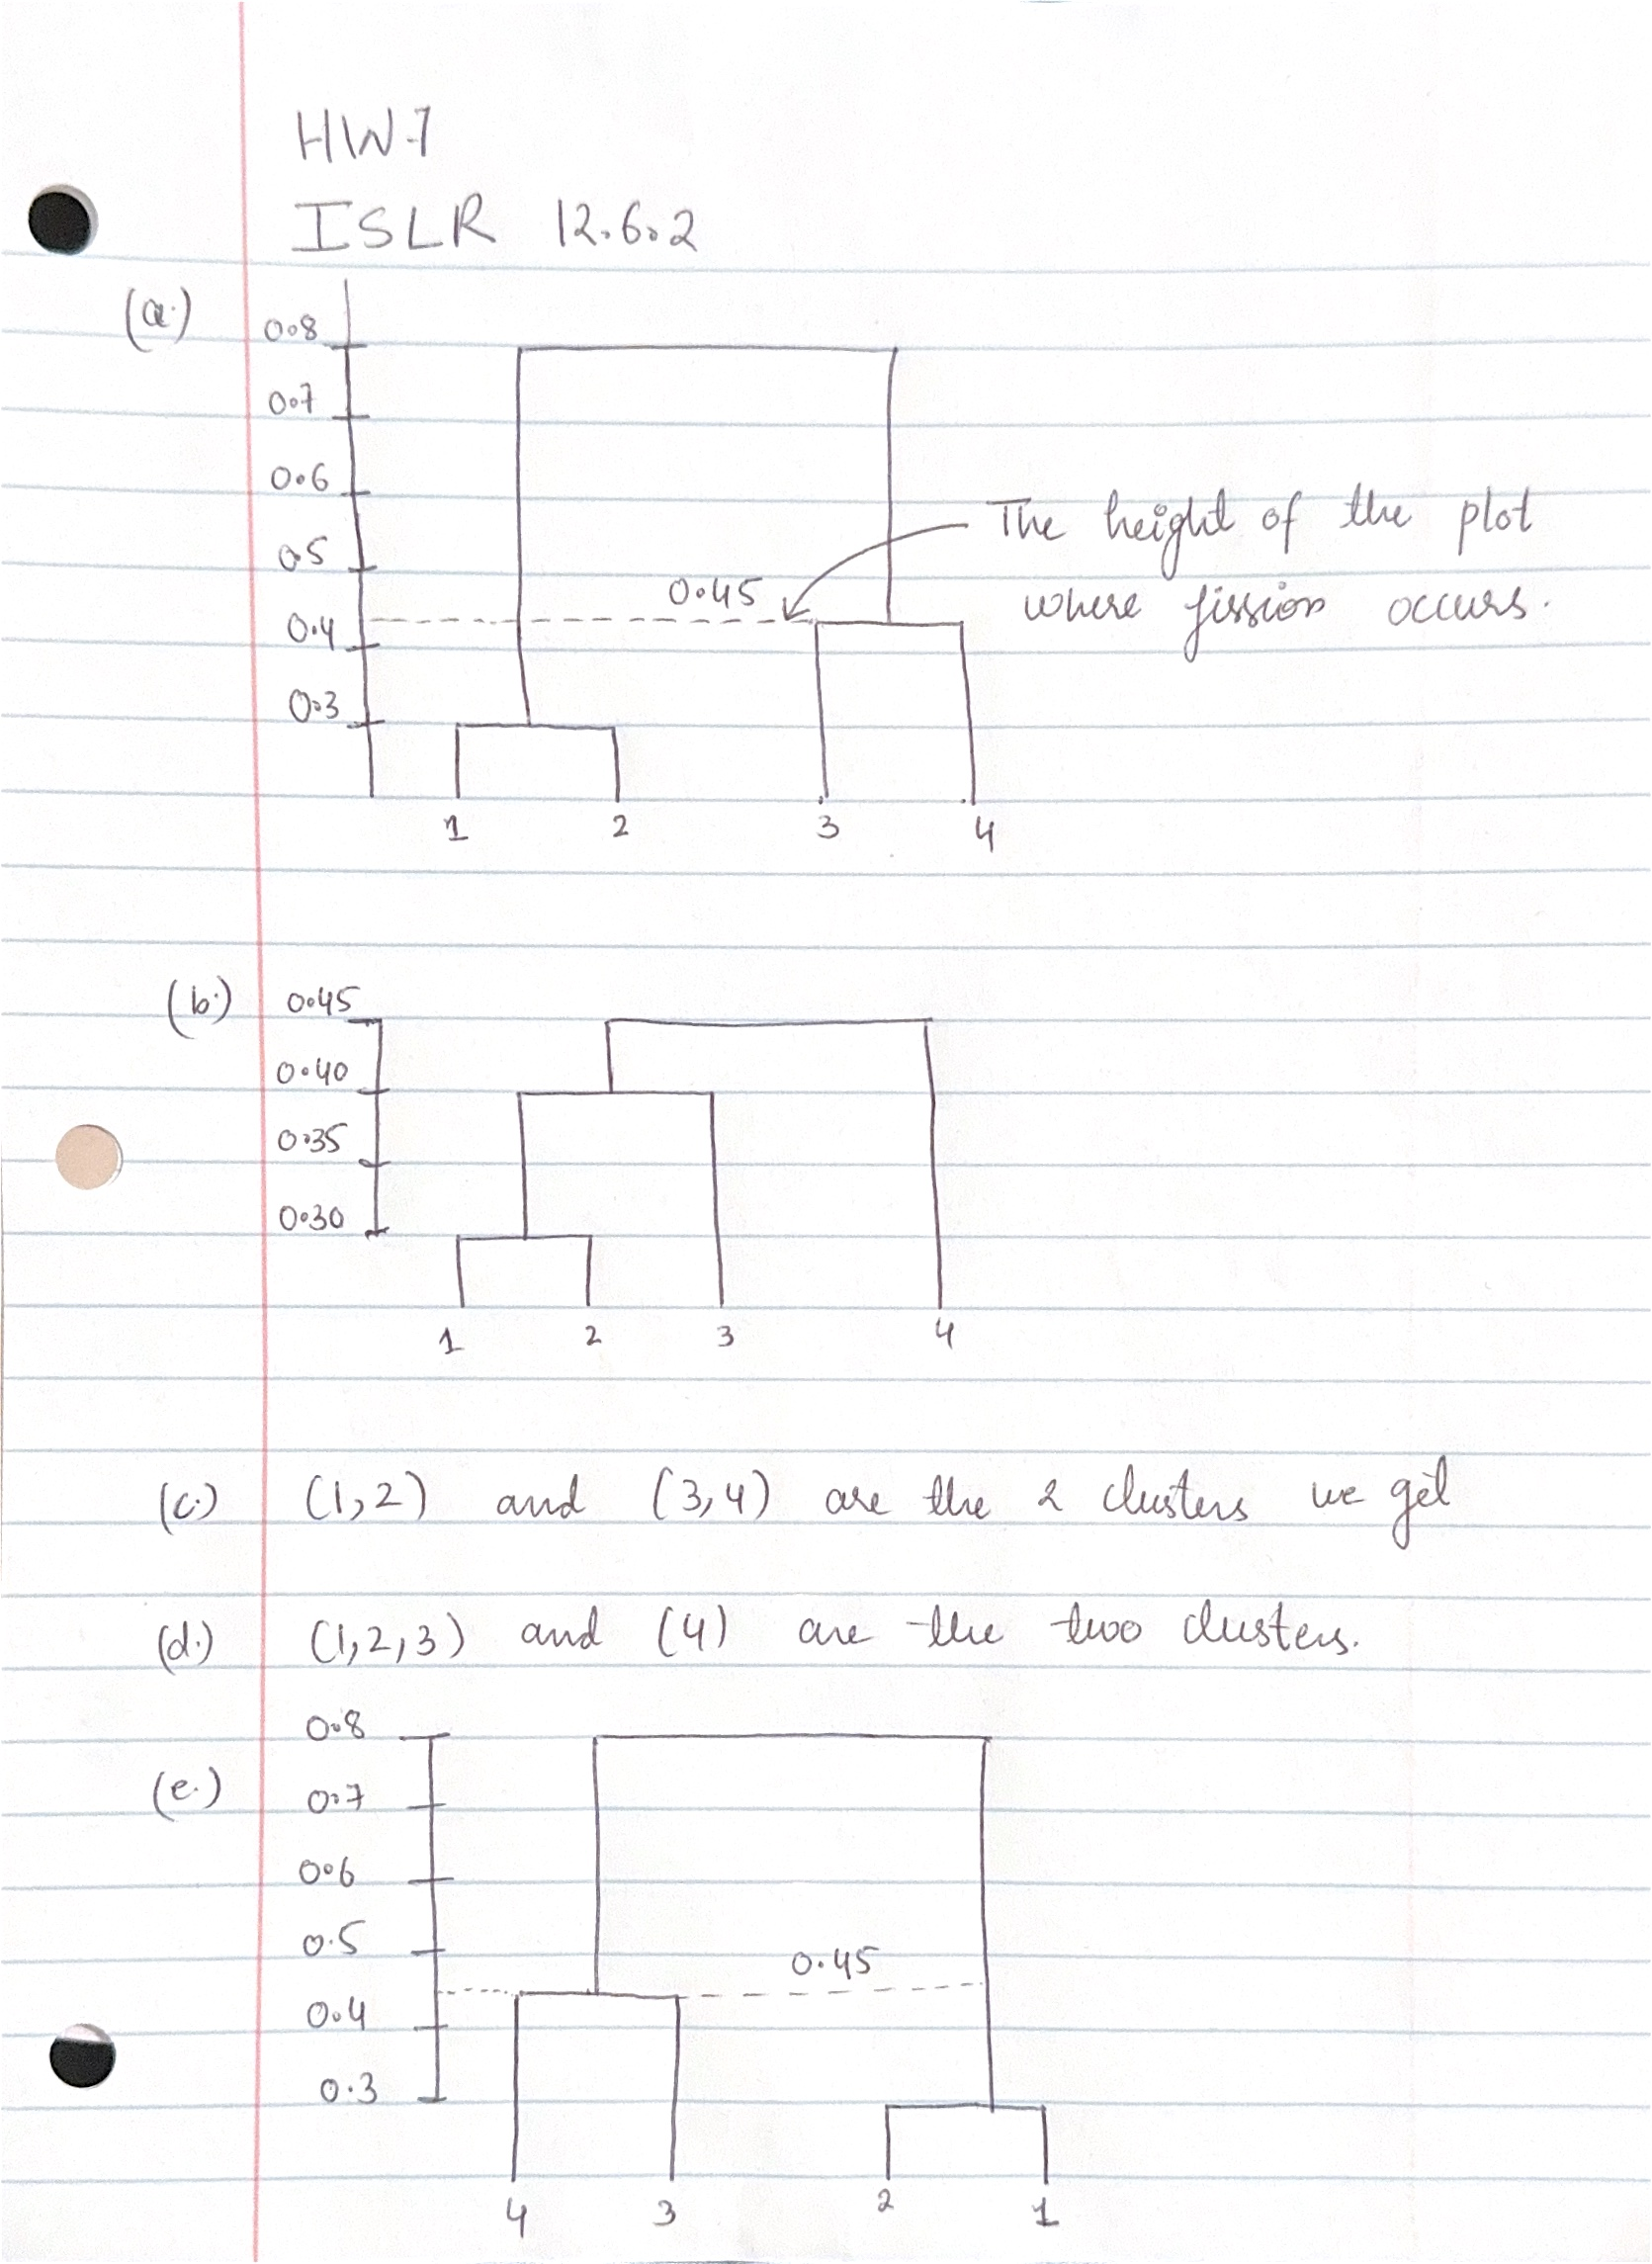